In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

In [198]:
df_employee1 = pd.read_excel("dataset 2022.xlsx", sheet_name='dataset1')
df_employee2 = pd.read_excel("dataset 2022.xlsx", sheet_name='dataset2')
df_employee3 = pd.read_excel("dataset 2022.xlsx", sheet_name='dataset3')
df_employee = df_employee1.append([df_employee2, df_employee3])
df_employee.columns = ['Employee_ID', 'Name', 'Gender', 'Education_Level', 'Job_Category', 'Age', 'Score', 'Phone_Number', 
                       'Domicile_Province', 'First_Day_Employement']
df_employee.head()

,Employee_ID,Name,Gender,Education_Level,Job_Category,Age,Score,Phone_Number,Domicile_Province,First_Day_Employement
0,1,Claire Gute,M,S1,Functional Expert Band 2,"37 years, 2 month, 11 days",3.98,628315242420,DKI Jakarta,2006-02-16
1,2,Darrin Van Huff,M,S2,Manager,"42 years, 3 month, 14 days",4.15,85246790036,Jakarta,12-20-2002
2,3,Sean O'Donnell,Male,SLTA,Staff,"48 years, 4 month, 25 days",3.98,85246833311,JKT,1997-08-20
3,4,Brosina Hoffman,M,S2,Manager,"50 years, 7 month, 2 days",3.23,85246990032,West Java,06/19/1993
4,5,Andrew Allen,F,S1,Trainee,"20 years, 4 month, 8 days",-,85247028027,Jawa Barat,06-25-2020


In [40]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 297
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employee_ID            930 non-null    int64 
 1   Name                   930 non-null    object
 2   Gender                 930 non-null    object
 3   Education_Level        930 non-null    object
 4   Job_Category           930 non-null    object
 5   Age                    930 non-null    object
 6   Score                  920 non-null    object
 7   Phone_Number           930 non-null    int64 
 8   Domicile_Province      930 non-null    object
 9   First_Day_Employement  930 non-null    object
dtypes: int64(2), object(8)
memory usage: 79.9+ KB


Make sure the criterion of Unique Column on Employee ID is fulfilled

In [41]:
print(df_employee['Employee_ID'].unique())
# find the duplicated rows from Employee_ID Column
print(df_employee[df_employee['Employee_ID'].duplicated()]['Employee_ID'].count())
print(df_employee['Employee_ID'].isnull().sum())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

Data Cleaning

In [199]:
df_employee['Gender'] = df_employee['Gender'].replace({'M':'Pria', 'Male':'Pria', 'Lakilaki':'Pria', 'Laki-laki':'Pria', 'Man':'Pria', 
                                                       'F':'Wanita', 'Female':'Wanita', 'Perempuan':'Wanita'})
# print(df_employee['Gender'].unique())
# print(df_employee['Gender'].isnull().sum())

df_employee['Education_Level'] = df_employee['Education_Level'].replace({'S1':'Sarjana', 'S2':'Pasca-Sarjana', 
                                                                         'D1':'Diploma', 'D4':'Diploma', 'D3':'Diploma','SLTA':'Pra-Sarjana', 
                                                                         'SMA':'Pra-Sarjana'})
# print(df_employee['Education_Level'].unique())
# print(df_employee['Education_Level'].isnull().sum())

df_employee['Job_Category'] = df_employee['Job_Category'].replace({'Senior Staff Band 2':'Senior Staff', 'Senior Staff Band 3':'Senior Staff', 
                                                                  'Functional Expert Band 3':'Senior Staff', 'Senior Staff Band 5':'Senior Staff', 
                                                                  'Functional Expert Band 2':'Functional Expert', 'Trainee':'Staff', 
                                                                  'Senior Vice President':'Vice President'})
# print(df_employee['Job_Category'].unique())
# print(df_employee['Job_Category'].isnull().sum())

df_employee['Domicile_Province'] = df_employee['Domicile_Province'].replace({'Jakarta':'DKI Jakarta', 'JKT':'DKI Jakarta', 
                                                        'Jakarta Selatan':'DKI Jakarta','South Jakarta':'DKI Jakarta', 'East Jakarta':'DKI Jakarta', 
                                                        'West Java':'Jawa Barat', 'Jabar':'Jawa Barat', 'Bandung':'Jawa Barat', 
                                                        'Purwakarta':'Jawa Barat', 'Depok':'Jawa Barat', 'Bogor':'Jawa Barat', 
                                                        'Bekasi':'Jawa Barat', 'Kalideres':'Jawa Barat', 'Sukabumi':'Jawa Barat', 
                                                        'Purwokerto':'Jawa Tengah', 'Yogyakarta':'DI Yogyakarta', 'DIY':'DI Yogyakarta', 
                                                        'Tangerang Selatan' :'Tangerang','Denpasar':'Bali'})
# print(df_employee['Domicile_Province'].unique())
# print(df_employee['Domicile_Province'].isnull().sum())

df_employee['Score'].fillna(0, inplace=True)
df_employee['Score'] = df_employee['Score'].astype(str).str.replace(' -   ','0').astype(float).round(2)
# print(df_employee['Score'].unique())
# print(df_employee['Score'].isnull().sum())

df_employee['First_Day_Employement'] = pd.to_datetime(df_employee['First_Day_Employement']).dt.strftime('%d/%m/%Y')
# print(df_employee['First_Day_Employement'].unique())

# print(df_employee['Name'].unique())
df_employee['Name'] = df_employee['Name'].str.replace('@','')
df_employee['Name'] = df_employee['Name'].str.replace('-','')
df_employee['Name'] = df_employee['Name'].str.replace(',,','')
df_employee['Name'] = df_employee['Name'].str.replace('.','')

fix_phone = []
for phon_num in df_employee['Phone_Number']:
    if str(phon_num).startswith('62'):
        phon_num = str(phon_num).replace('62','0')
    elif str(phon_num).startswith('8'):
        phon_num = '0'+ str(phon_num)
        fix_phone.append(phon_num)

df_employee['Phone_Number'] = pd.Series(fix_phone)
# print(df_employee['Phone_Number'].unique())

# Memisahkan umur menjadi tahun, bulan, dan hari
df_employee['Age'] = df_employee['Age'].str.replace('years','').str.replace('month','').str.replace('days','').str.strip()
temp_age =df_employee['Age'].str.split(',', n=2, expand=True)

# Mengonversi kolom ke dalam tipe data numerik
temp_age = temp_age.apply(pd.to_numeric)
temp_age.columns = ['years', 'months', 'days']

# Menghitung tanggal kelahiran dalam satuan hari
birth_days = temp_age['years'] * 365 + temp_age['months'] * 30 + temp_age['days']

# Tanggal awal yang akan digunakan sebagai referensi
start_date = pd.to_datetime('2020-01-01')

# Menghitung tanggal kelahiran
birth_dates = start_date - pd.to_timedelta(birth_days, unit='D')

# df_employee.drop(columns='Age', inplace=True)
df_employee['Age'] = temp_age['years']
df_employee.insert(5,"Birth_Date", birth_dates.dt.strftime('%d/%m/%Y'))

In [207]:
df_employee['Birth_Date'] = pd.to_datetime(df_employee['Birth_Date'])
df_employee['First_Day_Employement'] = pd.to_datetime(df_employee['First_Day_Employement'])
df_employee.head()

,Employee_ID,Name,Gender,Education_Level,Job_Category,Birth_Date,Age,Score,Phone_Number,Domicile_Province,First_Day_Employement
0,1,Claire Gute,Pria,Sarjana,Functional Expert,1982-10-31,37,3.98,085246790036,DKI Jakarta,2006-02-16
1,2,Darrin Van Huff,Pria,Pasca-Sarjana,Manager,1977-09-29,42,4.15,085246833311,DKI Jakarta,2002-12-20
2,3,Sean O'Donnell,Pria,Pra-Sarjana,Staff,1971-08-21,48,3.98,085246990032,DKI Jakarta,1997-08-20
3,4,Brosina Hoffman,Pria,Pasca-Sarjana,Manager,1969-06-15,50,3.23,085247028027,Jawa Barat,1993-06-19
4,5,Andrew Allen,Wanita,Sarjana,Staff,1999-08-31,20,0.00,085247198103,Jawa Barat,2020-06-25


In [209]:
print(df_employee['Birth_Date'].dtype)
print(df_employee['First_Day_Employement'].dtype)

datetime64[ns]
datetime64[ns]


In [83]:
df_employee.isnull().sum()

Employee_ID              0
Name                     0
Gender                   0
Education_Level          0
Job_Category             0
Birth_Date               0
Age                      0
Score                    0
Phone_Number             0
Domicile_Province        0
First_Day_Employement    0
dtype: int64

In [85]:
df_employee[df_employee.duplicated()].count()

Employee_ID              0
Name                     0
Gender                   0
Education_Level          0
Job_Category             0
Birth_Date               0
Age                      0
Score                    0
Phone_Number             0
Domicile_Province        0
First_Day_Employement    0
dtype: int64

In [102]:
df_employee.loc[df_employee['Name'].duplicated() == True].sort_values(by='Name', ascending=True)

,Employee_ID,Name,Gender,Education_Level,Job_Category,Birth_Date,Age,Score,Phone_Number,Domicile_Province,First_Day_Employement
258,891,Aaron Smayling,Pria,Pra-Sarjana,Functional Expert,09/09/1982,37,4.85,085247953209,Jawa Tengah,15/03/2008
9,642,Aaron Smayling,Wanita,Sarjana,Secretary,03/12/1995,24,0.00,085247977041,Jawa Barat,23/07/2019
219,560,Adam Bellavance,Pria,Sarjana,Functional Expert,01/11/1984,35,3.88,085247093534,DKI Jakarta,25/03/2011
130,763,Adam Hart,Pria,Pra-Sarjana,Functional Expert,01/06/1981,38,4.42,085247912180,Jawa Barat,19/12/2008
275,908,Adam Hart,Pria,Sarjana,Manager,28/10/1972,47,3.90,085247994110,Jawa Barat,16/02/1996
...,...,...,...,...,...,...,...,...,...,...,...
150,783,Yana Sorensen,Pria,Sarjana,Staff,14/10/1991,28,5.00,085247910035,DI Yogyakarta,22/04/2015
228,569,Zuschuss Carroll,Pria,Sarjana,Functional Expert,09/04/1969,50,3.67,085246719140,Jawa Barat,24/02/1994
235,576,Zuschuss Carroll,Pria,Diploma,Supervisor,04/11/1980,39,4.00,08524797036,Jawa Barat,24/08/2008
163,504,Zuschuss Carroll,Pria,Sarjana,Staff,10/06/1992,27,5.00,085247978041,Jawa Barat,20/07/2020


In [ ]:
print(df_employee[df_employee['Name'].duplicated() == True].count())
df_employee['Name'].value_counts().iloc[49:100]

Employee_ID              377
Name                     377
Gender                   377
Education_Level          377
Job_Category             377
Birth_Date               377
Age                      377
Score                    377
Phone_Number             377
Domicile_Province        377
First_Day_Employement    377
dtype: int64


Jeremy Pistek         3
Jeremy Ellison        3
Kelly Lampkin         3
Jas O'Carroll         3
Adam Hart             3
Bradley Nguyen        3
Brian Dahlen          3
Dorris liebe          3
Jonathan Doherty      3
Delfina Latchford     3
Kelly Collister       3
Logan Haushalter      3
Raymond Messe         3
Luke Foster           3
Aaron Smayling        3
Nat Gilpin            3
Gary Zandusky         3
Naresj Patel          3
Tracy Hopkins         3
Cynthia Voltz         3
Christopher Schild    3
Julie Creighton       3
Patrick O'Donnell     3
Liz Thompson          3
Katherine Ducich      3
Ken Brennan           3
Bryan Mills           3
Greg Guthrie          3
Steven Cartwright     3
Karen Daniels         3
Dan Lawera            3
Philip Fox            3
Resi PÃ¶lking         3
Christina Anderson    3
Pete Kriz             3
Troy Staebel          3
Phillina Ober         3
Bryan Davis           2
John Grady            2
Erin Mull             2
Dan Campbell          2
Michael Chen    

In [129]:
display(df_employee[df_employee['Name'].isin(['Joel Eaton', 'Tracy Blumstein', 'Logan Currie', 'Russell Applegate', 'Zuschuss Carroll', 'Meg O\'Connel', 
                          'Tamara Dahlen', 'Claudia Bergmann', 'Greg Tran', 'Patrick Gardner', 'Cynthia Arntzen', 'Cyma Kinney', 'Sue Ann Reed'])
                          ].sort_values(by='Name', ascending=True))
display(df_employee[df_employee['Name'].isin(['Victoria Wilson', 'Paul Gonzalez', 'Clay Ludtke', 'Roy Collins', 'George Bell', 'Jennifer Braxton', 
                                              'Ross Baird','Alan Dominguez','Dave Brooks','Harold Pawlan','Irene Maddox','Dean Katz'])
                          ].sort_values(by='Name', ascending=True))
display(df_employee[df_employee['Name'].isin(['Chuck Clark','Allen Armold','Valerie Dominguez','Laurel Elliston','Lindsay Williams','Heather Kirkland',
                                              'Mark Packer','Jeremy Farry','Damala Kotsoni','Helen Andreada','Sara Luxemburg','Erin Ashbrook',
                                              'Nicole Hansen'])].sort_values(by='Name', ascending=True))
display(df_employee[df_employee['Name'].isin(['David Bremer','Ken Lonsdale','Roy FranzÃ¶sisch','Caroline Jumpe','Shirley Daniel''Hunter Lopez',
                                              'Arthur Gainer ','Victoria Brennan','Ed Braxto','Sanjit Chand','Joni Sundaresa','Jeremy Pistek',
                                              'Jeremy Ellison', 'Kelly Lampkin', 'Jas O\'Carroll', 'Adam Hart', 'Bradley Nguyen', 'Brian Dahlen', 
                                              'Dorris liebe', 'Jonathan Doherty'])
                                              ].sort_values(by='Name', ascending=True))
display(df_employee[df_employee['Name'].isin(['Delfina Latchford', 'Kelly Collister', 'Logan Haushalter', 'Raymond Messe', 'Luke Foster', 
                        'Aaron Smayling', 'Nat Gilpin', 'Gary Zandusky', 'Naresj Patel', 'Tracy Hopkins', 'Cynthia Voltz', 
                        'Christopher Schild', 'Julie Creighton', 'Patrick O\'Donnell', 'Liz Thompson', 'Katherine Ducich'])
                        ].sort_values(by='Name', ascending=True))
display(df_employee[df_employee['Name'].isin(['Ken Brennan', 'Bryan Mills', 'Greg Guthrie', 'Steven Cartwright', 'Karen Daniels', 'Dan Lawera', 
                            'Philip Fox', 'Resi PÃ¶lking', 'Christina Anderson','Pete Kriz', 'Troy Staebel', 'Phillina Ober', 'Bryan Davis', 
                            'John Grady'])].sort_values(by='Name', ascending=True))
display(df_employee[df_employee['Name'].isin(['Erin Mull', 'Dan Campbell', 'Michael Chen', 'CoreyLock', 'Dave Poirier', 'Cindy Stewart', 
                                              'Maribeth Yedwab', 'Maribeth Dona', 'Alan Barnes', 'Yana Sorensen', 'Jesus Ocampo', 'Ken Heidel'])
                                              ].sort_values(by='Name', ascending=True))

,Employee_ID,Name,Gender,Education_Level,Job_Category,Birth_Date,Age,Score,Phone_Number,Domicile_Province,First_Day_Employement
205,546,Claudia Bergmann,Pria,Sarjana,Manager,29/06/1981,38,4.03,085246860540,Tangerang,21/07/2006
182,815,Claudia Bergmann,Pria,Sarjana,Supervisor,27/08/1984,35,4.16,085246910035,DKI Jakarta,19/08/2008
123,124,Claudia Bergmann,Pria,Sarjana,Manager,06/08/1978,41,4.41,085247047201,DI Yogyakarta,18/08/2004
230,863,Claudia Bergmann,Pria,Sarjana,Supervisor,29/03/1987,32,4.52,08524697109,Jawa Barat,20/11/2012
80,421,Cyma Kinney,Pria,Pasca-Sarjana,Staff,28/10/1986,33,4.82,08524797109,DKI Jakarta,24/10/2012
26,659,Cyma Kinney,Pria,Pasca-Sarjana,Supervisor,08/08/1978,41,4.20,085246990036,Bali,26/06/2006
283,916,Cyma Kinney,Pria,Sarjana,Staff,01/07/1993,26,4.05,085247995123,DI Yogyakarta,21/01/2019
55,396,Cyma Kinney,Pria,Sarjana,Supervisor,25/05/1988,31,3.86,08524797090,Bali,17/12/2016
146,779,Cynthia Arntzen,Pria,Sarjana,Manager,01/06/1973,46,3.04,085246990036,DKI Jakarta,24/01/1998
110,451,Cynthia Arntzen,Pria,Sarjana,Functional Expert,04/05/1984,35,4.70,085246928403,Jawa Tengah,26/02/2011


,Employee_ID,Name,Gender,Education_Level,Job_Category,Birth_Date,Age,Score,Phone_Number,Domicile_Province,First_Day_Employement
60,61,Alan Dominguez,Pria,Sarjana,Functional Expert,29/10/1985,34,3.73,085246790604,Jawa Barat,21/05/2009
287,628,Alan Dominguez,Pria,Sarjana,Staff,16/11/1995,24,4.16,085247910024,Jawa Barat,23/02/2019
264,605,Alan Dominguez,Wanita,Pasca-Sarjana,Staff,26/09/1989,30,4.00,085246722153,Jawa Tengah,22/04/2017
236,237,Alan Dominguez,Pria,Sarjana,Senior Staff,10/08/1971,48,2.63,085247993905,Jawa Barat,22/02/1995
159,792,Clay Ludtke,Pria,Sarjana,Functional Expert,31/07/1976,43,4.43,085247098105,Bali,23/11/2004
126,759,Clay Ludtke,Wanita,Sarjana,Functional Expert,01/09/1990,29,3.89,085247960610,Jawa Tengah,20/04/2017
55,56,Clay Ludtke,Pria,Sarjana,Manager,27/07/1970,49,4.03,08524797090,Jawa Barat,17/03/1996
24,365,Clay Ludtke,Pria,Sarjana,Supervisor,28/10/1977,42,3.99,085246755901,DI Yogyakarta,15/05/2001
89,430,Dave Brooks,Pria,Sarjana,Staff,05/12/1991,28,4.06,085247994122,Jawa Barat,17/06/2016
75,76,Dave Brooks,Pria,Diploma,Functional Expert,19/07/1978,41,4.00,08524707960,DKI Jakarta,18/11/2002


,Employee_ID,Name,Gender,Education_Level,Job_Category,Birth_Date,Age,Score,Phone_Number,Domicile_Province,First_Day_Employement
246,247,Allen Armold,Pria,Diploma,Supervisor,09/05/1973,46,4.60,085247994109,Jawa Barat,15/05/1998
216,557,Allen Armold,Pria,Diploma,Functional Expert,30/10/1973,46,0.00,085246794110,Jawa Barat,23/05/2000
37,378,Allen Armold,Pria,Sarjana,Manager,04/06/1978,41,4.27,085246885023,Jawa Barat,26/10/2005
285,918,Chuck Clark,Pria,Sarjana,Supervisor,28/05/1977,42,4.00,085247942420,Jawa Barat,15/10/2003
266,607,Chuck Clark,Pria,Sarjana,Supervisor,07/12/1979,40,3.13,085246919140,DI Yogyakarta,15/08/2005
70,411,Chuck Clark,Pria,Sarjana,Staff,23/03/1991,28,4.69,085247910009,Jawa Barat,16/12/2015
299,300,Chuck Clark,Wanita,Sarjana,Staff,29/06/1991,28,0.00,085247963376,DI Yogyakarta,23/01/2015
251,884,Erin Ashbrook,Wanita,Sarjana,Supervisor,13/06/1969,50,3.49,085247921044,Jawa Barat,25/07/1996
109,110,Erin Ashbrook,Pria,Pasca-Sarjana,Senior Staff,29/04/1983,36,3.53,085246833180,Bali,25/12/2007
23,364,Erin Ashbrook,Pria,Sarjana,Staff,29/08/1992,27,4.51,085247960623,Jawa Barat,20/01/2020


,Employee_ID,Name,Gender,Education_Level,Job_Category,Birth_Date,Age,Score,Phone_Number,Domicile_Province,First_Day_Employement
275,908,Adam Hart,Pria,Sarjana,Manager,28/10/1972,47,3.90,085247994110,Jawa Barat,16/02/1996
130,763,Adam Hart,Pria,Pra-Sarjana,Functional Expert,01/06/1981,38,4.42,085247912180,Jawa Barat,19/12/2008
99,440,Adam Hart,Pria,Pasca-Sarjana,Functional Expert,01/10/1978,41,3.84,08524706040,Bali,18/07/2002
201,834,Bradley Nguyen,Pria,Sarjana,Staff,28/07/1989,30,3.96,085247933012,Jawa Barat,16/01/2014
7,640,Bradley Nguyen,Pria,Sarjana,Staff,07/12/1988,31,4.22,085247977095,DKI Jakarta,22/06/2013
235,236,Bradley Nguyen,Pria,Diploma,Manager,13/08/1972,47,3.51,08524797036,Jawa Barat,19/01/2000
198,539,Brian Dahlen,Pria,Sarjana,Supervisor,19/06/1980,39,4.41,085247990045,Jawa Tengah,24/04/2005
291,292,Brian Dahlen,Pria,Sarjana,Staff,18/09/1991,28,4.73,085247060653,Jawa Barat,20/06/2018
240,241,Brian Dahlen,Pria,Sarjana,Manager,25/04/1981,38,3.63,085246794122,Bali,21/07/2008
30,371,David Bremer,Pria,Pra-Sarjana,Supervisor,24/04/1977,42,4.11,085247910035,Jawa Barat,18/12/2005


,Employee_ID,Name,Gender,Education_Level,Job_Category,Birth_Date,Age,Score,Phone_Number,Domicile_Province,First_Day_Employement
9,642,Aaron Smayling,Wanita,Sarjana,Secretary,03/12/1995,24,0.00,085247977041,Jawa Barat,23/07/2019
258,891,Aaron Smayling,Pria,Pra-Sarjana,Functional Expert,09/09/1982,37,4.85,085247953209,Jawa Tengah,15/03/2008
5,638,Aaron Smayling,Pria,Sarjana,Supervisor,31/07/1987,32,4.04,085247990049,Bali,16/02/2013
123,756,Christopher Schild,Pria,Diploma,Manager,27/06/1968,51,3.74,085247047201,DKI Jakarta,17/11/1995
39,40,Christopher Schild,Pria,Sarjana,Functional Expert,09/04/1982,37,4.52,085247043229,Tangerang,15/03/2006
110,111,Christopher Schild,Wanita,Sarjana,Staff,05/06/1980,39,3.93,085246928403,DKI Jakarta,20/01/2004
54,55,Cynthia Voltz,Pria,Sarjana,Functional Expert,02/07/1984,35,4.13,085247945011,Jawa Tengah,21/02/2009
119,460,Cynthia Voltz,Pria,Sarjana,Staff,05/07/1990,29,4.21,085247932216,Jawa Barat,21/05/2015
202,203,Cynthia Voltz,Pria,Sarjana,Functional Expert,22/07/1985,34,3.96,085247978745,Jawa Barat,15/06/2009
214,555,Delfina Latchford,Pria,Pasca-Sarjana,Staff,11/04/1989,30,4.00,085247922204,Jawa Barat,21/01/2017


,Employee_ID,Name,Gender,Education_Level,Job_Category,Birth_Date,Age,Score,Phone_Number,Domicile_Province,First_Day_Employement
258,599,Bryan Davis,Pria,Sarjana,Staff,07/12/1991,28,3.95,085247953209,Jawa Barat,16/12/2015
229,862,Bryan Davis,Pria,Sarjana,Staff,02/08/1994,25,0.00,085246819140,Jawa Barat,25/05/2020
275,616,Bryan Mills,Pria,Sarjana,Supervisor,31/10/1983,36,4.43,085247994110,Bali,26/06/2010
22,363,Bryan Mills,Wanita,Sarjana,Supervisor,24/07/1970,49,3.17,085247927707,Jawa Tengah,24/07/1994
212,845,Bryan Mills,Pria,Sarjana,Supervisor,04/06/1977,42,4.17,085247971111,DKI Jakarta,25/07/2004
285,286,Christina Anderson,Wanita,Diploma,Supervisor,18/06/1981,38,4.03,085247942420,Bali,16/09/2009
205,838,Christina Anderson,Pria,Sarjana,Functional Expert,26/08/1985,34,4.09,085246860540,DKI Jakarta,15/04/2010
21,654,Christina Anderson,Pria,Sarjana,Functional Expert,25/08/1981,38,4.54,085247994122,Jawa Barat,23/11/2008
20,361,Dan Lawera,Wanita,Sarjana,Supervisor,07/11/1990,29,3.61,085247935601,DKI Jakarta,24/01/2017
286,919,Dan Lawera,Pria,Sarjana,Supervisor,01/12/1976,43,4.26,085247998661,Jawa Barat,25/01/2003


,Employee_ID,Name,Gender,Education_Level,Job_Category,Birth_Date,Age,Score,Phone_Number,Domicile_Province,First_Day_Employement
102,443,Alan Barnes,Wanita,Pasca-Sarjana,Staff,25/05/1991,28,4.55,085247945231,DKI Jakarta,16/10/2016
320,321,Alan Barnes,Pria,Pra-Sarjana,Supervisor,23/06/1982,37,4.51,085247972401,DI Yogyakarta,22/10/2009
89,722,Cindy Stewart,Pria,Sarjana,Functional Expert,08/07/1981,38,4.07,085247994122,Tangerang,22/05/2009
71,704,Cindy Stewart,Pria,Sarjana,Supervisor,03/10/1976,43,4.62,085247977506,Bali,16/09/2002
297,930,CoreyLock,Pria,Sarjana,Functional Expert,30/06/1986,33,3.81,085247990004,Jawa Barat,19/03/2014
78,711,CoreyLock,Pria,Sarjana,Supervisor,09/08/1988,31,3.47,085247943229,Jawa Barat,19/07/2012
11,644,Dan Campbell,Pria,Sarjana,Supervisor,09/11/1987,32,4.08,085247990049,Jawa Barat,26/03/2013
255,596,Dan Campbell,Pria,Sarjana,Manager,21/06/1980,39,3.78,085247077095,DKI Jakarta,17/04/2005
56,397,Dave Poirier,Pria,Sarjana,Staff,30/08/1991,28,4.46,085247919120,DKI Jakarta,23/04/2015
218,559,Dave Poirier,Wanita,Sarjana,Supervisor,10/05/1982,37,3.85,085246929203,DKI Jakarta,26/06/2007


In [138]:
print(df_employee[df_employee['Birth_Date'].duplicated() == True].count())
df_employee['Birth_Date'].value_counts().iloc[:50]

Employee_ID              44
Name                     44
Gender                   44
Education_Level          44
Job_Category             44
Birth_Date               44
Age                      44
Score                    44
Phone_Number             44
Domicile_Province        44
First_Day_Employement    44
dtype: int64


02/09/1980    3
05/07/1990    3
06/09/1974    2
26/09/1981    2
15/10/1992    2
07/12/1980    2
13/04/1972    2
24/04/1977    2
10/06/1983    2
09/11/1977    2
29/05/1989    2
21/03/1983    2
13/07/1972    2
26/10/1989    2
26/08/1988    2
01/09/1980    2
26/11/1989    2
19/10/1977    2
05/12/1996    2
08/06/1982    2
23/06/1971    2
06/08/1984    2
27/10/1978    2
29/06/1981    2
22/07/1976    2
16/05/1994    2
07/12/1991    2
23/08/1978    2
25/09/1990    2
24/11/1993    2
06/05/1992    2
20/11/1973    2
05/08/1988    2
11/06/1972    2
17/11/1990    2
16/08/1984    2
08/08/1978    2
06/04/1980    2
28/09/1985    2
13/11/1970    2
21/11/1986    2
14/10/1991    2
26/04/1964    1
03/09/1981    1
31/10/1983    1
28/10/1990    1
12/04/1977    1
23/11/1994    1
25/08/1980    1
05/06/1993    1
Name: Birth_Date, dtype: int64

In [137]:
print(df_employee[df_employee['First_Day_Employement'].duplicated() == True].count())
df_employee['First_Day_Employement'].value_counts().iloc[:50]

Employee_ID              113
Name                     113
Gender                   113
Education_Level          113
Job_Category             113
Birth_Date               113
Age                      113
Score                    113
Phone_Number             113
Domicile_Province        113
First_Day_Employement    113
dtype: int64


26/10/2020    4
23/11/2004    4
23/11/2008    4
23/09/2016    3
20/09/2020    3
24/02/2020    3
17/06/2020    3
20/10/2020    3
15/06/2009    3
21/01/2017    2
23/02/2020    2
21/04/2018    2
21/10/1996    2
25/03/2000    2
25/03/2018    2
16/11/2007    2
25/03/2007    2
17/02/2011    2
25/12/2007    2
20/01/2020    2
18/05/2016    2
18/05/2008    2
22/04/2015    2
20/08/2016    2
15/11/2009    2
20/11/2017    2
26/09/2015    2
25/12/2014    2
16/10/2018    2
24/07/2001    2
16/12/2015    2
16/12/2020    2
17/03/2012    2
22/01/2004    2
22/08/2007    2
26/09/2007    2
25/03/2011    2
23/05/2000    2
19/01/2007    2
17/04/2005    2
26/09/2016    2
24/03/2017    2
23/03/1994    2
19/07/1997    2
26/01/2010    2
21/11/1997    2
26/11/2017    2
18/12/2018    2
23/04/2017    2
15/08/2005    2
Name: First_Day_Employement, dtype: int64

In [140]:
print(df_employee[df_employee.duplicated(subset=['Name','Birth_Date','First_Day_Employement']) == True].count())

Employee_ID              0
Name                     0
Gender                   0
Education_Level          0
Job_Category             0
Birth_Date               0
Age                      0
Score                    0
Phone_Number             0
Domicile_Province        0
First_Day_Employement    0
dtype: int64


In the case of duplicated data, the redudant data only occured in Employee Name columns, although when checking the column name by detail, employee with same name actually have different birth date and first day employement date. It's hard to believe that the employee suddenly change his/her birth date or date of first day employement. More specifically when check the duplicate to 3 columns at once time whiches are `Name`,`Birth_Date`,`First_Day_Employement` that using parameter `subset` in function `.duplicated` that exactly doesn't found. So once again, the conclusion that this data isn't duplicate, but it may be debatable for the further discussion.

In [210]:
# menambahkan kategori kelompok umur
def age_group(age):
    age = int(age)
    age_group = ''
    # umur 20 - 35
    if age >= 20  and age <= 35:
        age_group = '20 - 35'
    # umur 35 - 45
    elif age >= 36  and age <= 45:
        age_group = '36 - 45'
    # umur 46 keatas
    elif age >= 46:
        age_group = '46 to Above'
    return age_group

# memasukan kelompok umur ke tabel
df_employee.insert(7,"Age_Group", df_employee['Age'].apply(age_group))

In [211]:
# df_employee.to_csv('cleaned_employee.csv', index=False)

In [142]:
display(df_employee.describe())
display(df_employee.describe(include=[object]))

,Employee_ID,Age,Score
count,930.000000,930.000000,930.000000
mean,465.500000,36.546237,3.746505
std,268.612174,7.858032,1.006500
min,1.000000,20.000000,0.000000
25%,233.250000,30.000000,3.640000
50%,465.500000,37.000000,3.970000
75%,697.750000,42.000000,4.230000
max,930.000000,55.000000,5.000000


,Name,Gender,Education_Level,Job_Category,Birth_Date,Age_Group,Phone_Number,Domicile_Province,First_Day_Employement
count,930,930,930,930,930,930,930,930,930
unique,553,2,4,7,886,3,270,6,817
top,Joel Eaton,Pria,Sarjana,Staff,02/09/1980,20 - 35,085247910035,Jawa Barat,26/10/2020
freq,7,734,734,317,3,408,21,423,4


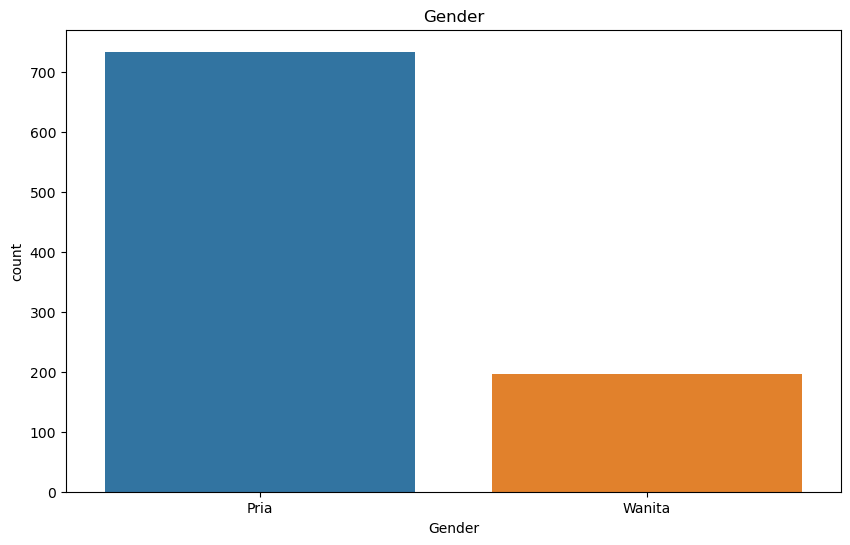

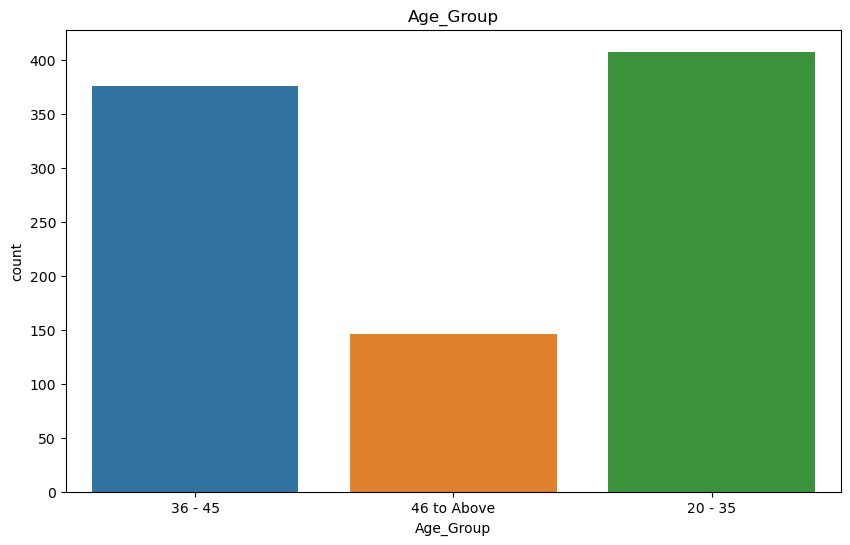

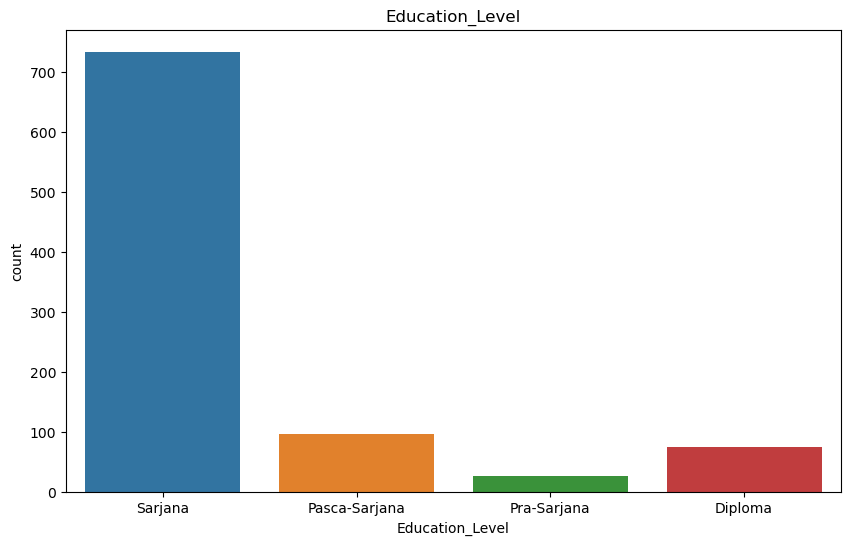

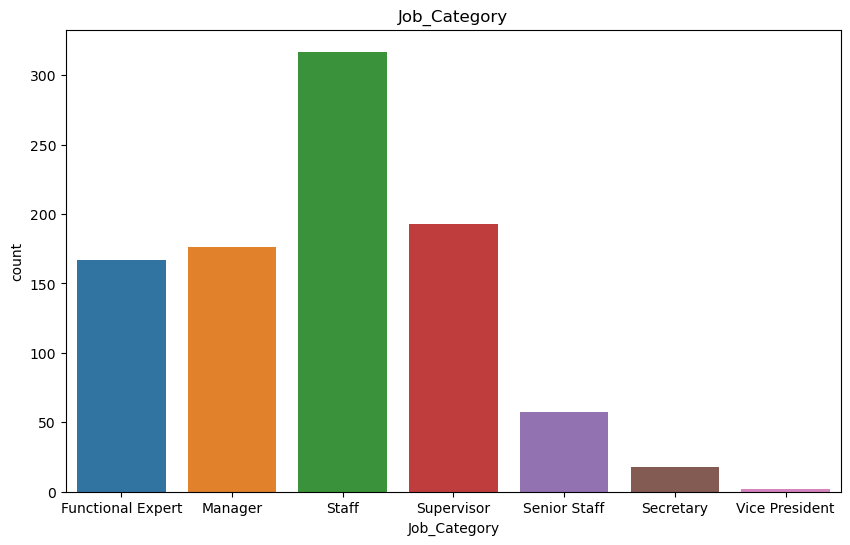

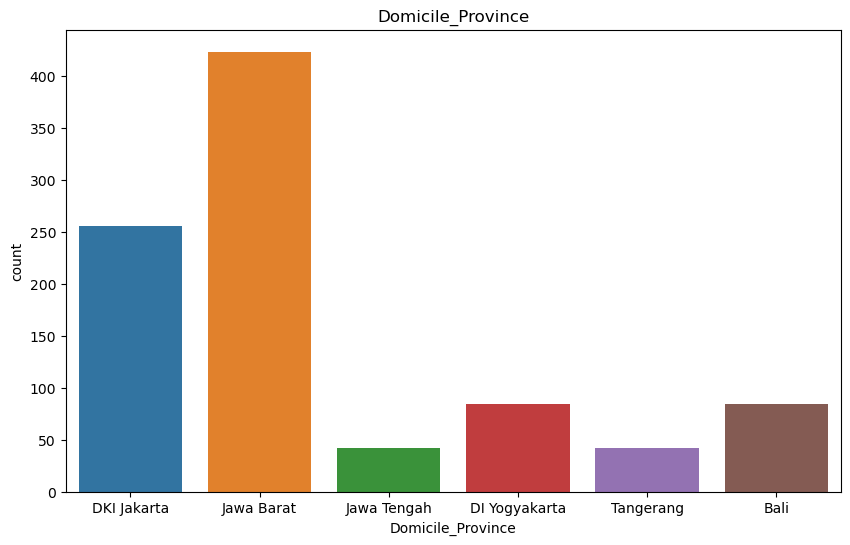

In [154]:
for categ in ['Gender', 'Age_Group','Education_Level', 'Job_Category', 'Domicile_Province']:
    plt.figure(figsize=(10,6))
    sns.countplot(x=categ, data=df_employee)
    plt.title(categ)
    plt.show()

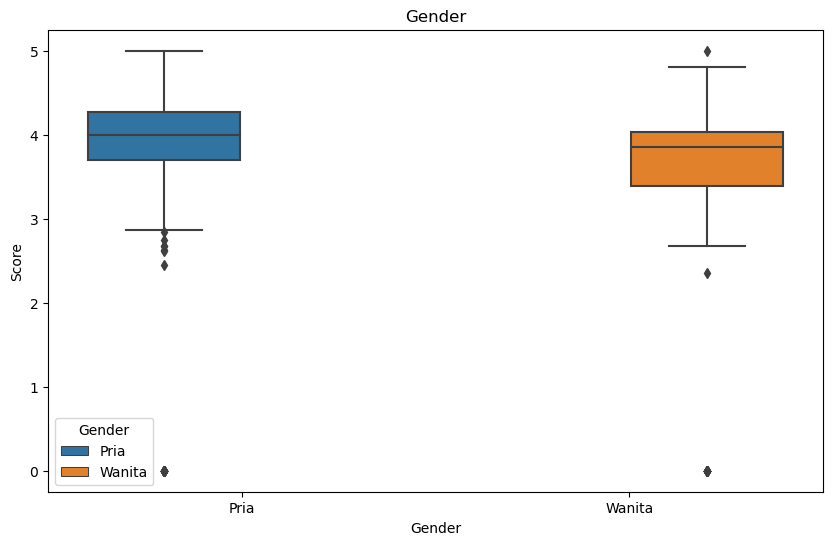

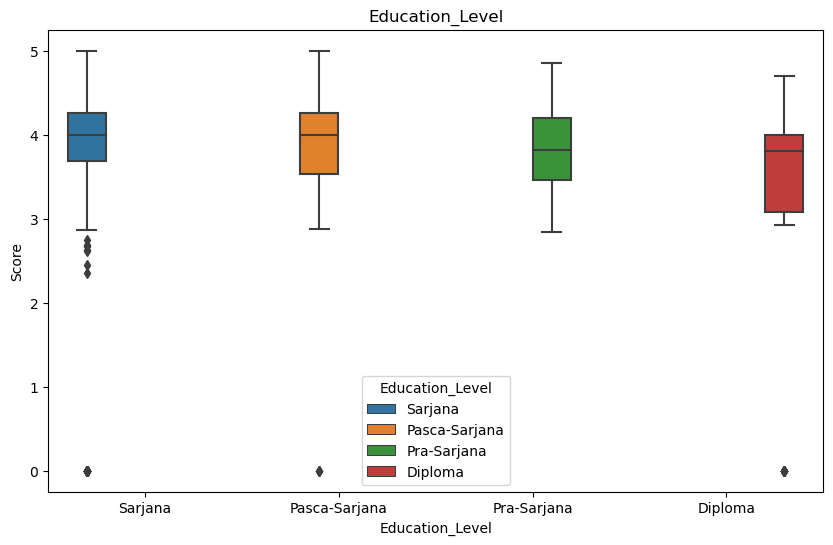

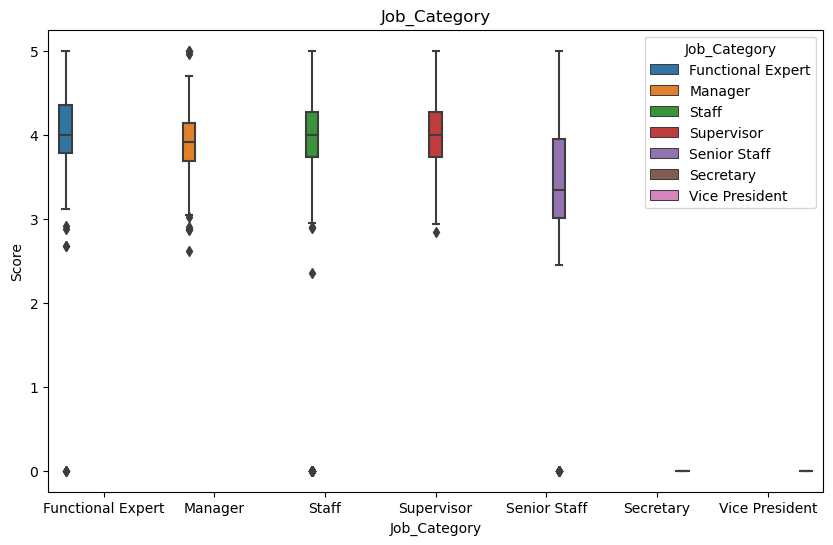

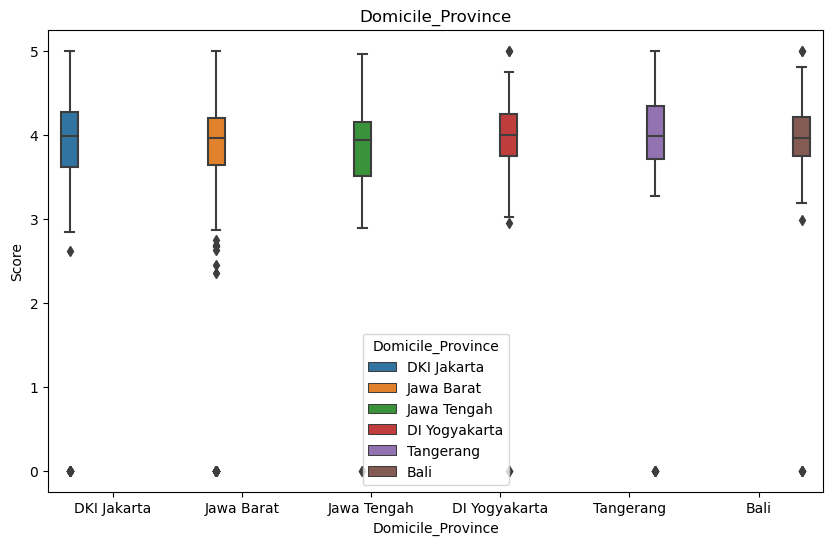

In [175]:
for categ in ['Gender','Education_Level', 'Job_Category', 'Domicile_Province']:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=categ, y='Score', data=df_employee, hue=categ)
    plt.title(categ)
    plt.show()

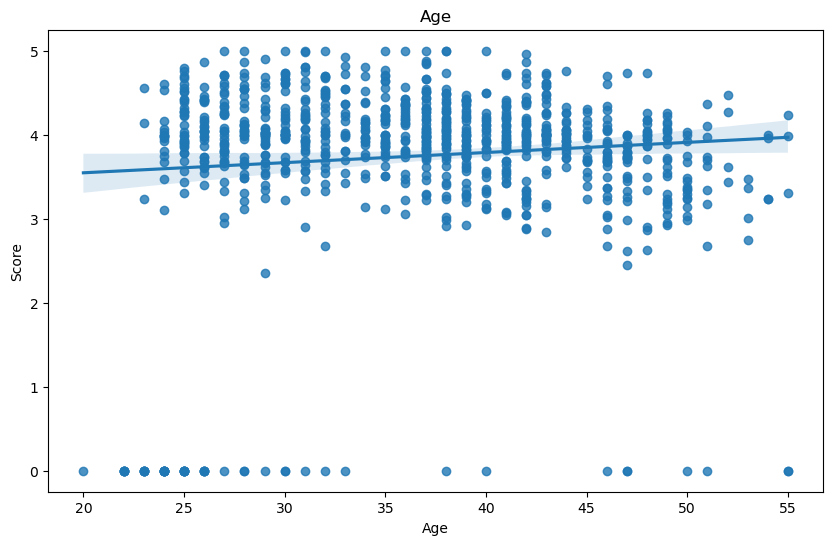

In [178]:
plt.figure(figsize=(10,6))
sns.regplot(x='Age', y='Score', data=df_employee)
plt.title('Age')
plt.show()

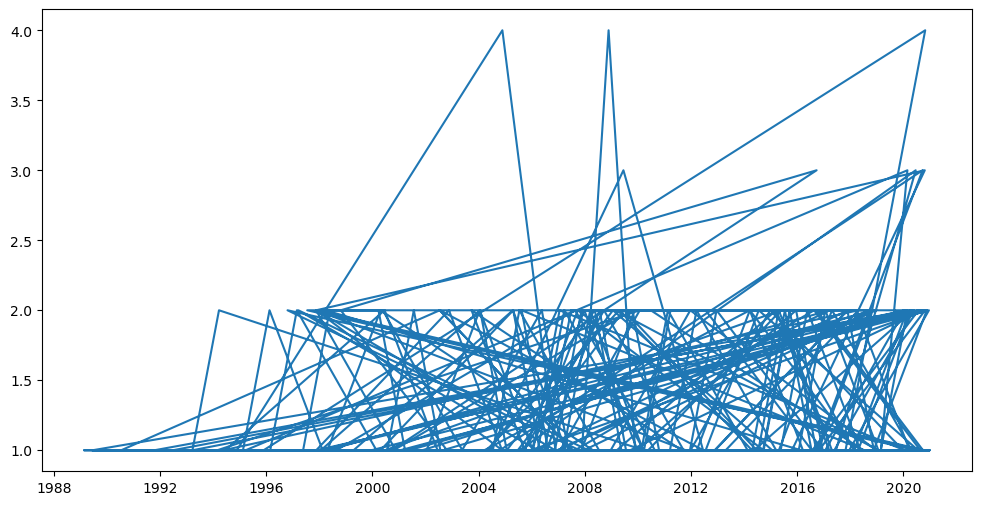

In [194]:
plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(df_employee.groupby('First_Day_Employement')['Employee_ID'].count().index).date,
         df_employee.groupby('First_Day_Employement')['Employee_ID'].count())
plt.show()

Disposal Codes

In [63]:
# df_employee['Age'] = df_employee['Age'].str.replace('years','').str.replace('month','').str.replace('days','').str.strip()
# temp_age =df_employee['Age'].str.split(',', n=2, expand=True)
# # tahun lahir
# temp_age[3] = 2020 - temp_age[0].astype(int)
# # bulan lahir
# temp_age[4] = 1 - temp_age[1].astype(int)
# # tanggal lahir
# temp_age[5] = 1 - temp_age[2].astype(int)

# # buat variabel untuk menampung list
# lst_year = [] # temp_age[6] sebagai tahun lahir baru
# lst_month = [] # temp_age[7] sebagai bulan lahir baru
# lst_day = [] # temp_age[8] sebagai tanggal lahir baru

# for idx, row in temp_age.iterrows():
#     # jika bulan lahir kurang dari 0 dan tanggal lahir kurang dari 0
#     if (row[4]<0) and (row[5]<0) :
#         lst_year.append(row[3] - 1)
#         lst_month.append(row[4] + 12)
#         if (row[4] + 12) == 1 and (row[4] + 12) == 3 and (row[4] + 12) == 5 and (row[4] + 12) == 7 and (row[4] + 12) == 8  \
#             and (row[4] + 12) == 10 and (row[4] + 12) == 12:
#             lst_day.append(row[5] + 31)
#         elif (row[4] + 12) == 4 and (row[4] + 12) == 6 and (row[4] + 12) == 9:
#             lst_day.append(row[5] + 30)
#         elif (row[4] + 12) == 2:
#             if row[6] % 4 == 0:
#                 lst_day.append(row[5] + 29)
#             else:
#                 lst_day.append(row[5] + 28)
#     # jika tanggal lahir yang kurang dari 0, namun bulan lahir lebih dari 0
#     elif (row[5]<0):
#         # jika bulan 3, 5, 6, 7, 8, 10, 12 maka tanggal 31 - day
#         if row[4] == 3 and row[4] == 5 and row[4] == 7 and row[4] == 8 and row[4] == 10 and row[4] == 12:
#             lst_year.append(row[3])
#             lst_month.append(row[4] - 1)
#             lst_day.append((row[5]) + 31)
#         # jika bulan 4,6,9 maka 30 - day
#         elif row[4] == 1 and row[4] == 3 and row[4] == 5 and row[4] == 7:
#             lst_year.append(row[3])
#             lst_month.append(row[4] - 1)
#             lst_day.append((row[5]) + 30)
#         # jika bulan 2 namun tahun % 4 == 0 maka 29 - day, else 28-day
#         elif row[4] == 2:
#             if row[3] % 4== 0:
#                 lst_year.append(row[3])
#                 lst_month.append(row[4] - 1)
#                 lst_day.append(row[5] + 29)
#             else:
#                 lst_year.append(row[3])
#                 lst_month.append(row[4] - 1)
#                 lst_day.append(row[5] + 28)
#         # jika bulan 1 maka bulan jadi 12, tahun dikurang 1, tanggal tambah 31
#         elif row[4] == 1:
#             lst_year.append(row[3] - 1)
#             lst_month.append(12)
#             lst_day.append(row[5] + 31)
#     # jika bulan lahir yang kurang dari 0
#     elif (row[4] < 0):
#         lst_year.append(row[3] - 1)
#         lst_month.append(row[4] + 12)
#         lst_day.append(row[5])
#     else:
#         lst_year.append(row[3])
#         lst_month.append(row[4])
#         lst_day.append(row[5])

# list(zip(lst_year, lst_month, lst_day))
# temp_age[(temp_age[4]<0) & (temp_age[5]<0)]
# del birth_day, birth_month, birth_year
# print(df_employee['Age'].unique())

# for idx, row in temp_age.iterrows:
#     res = row[4] + 12
#     res2 = row[5] + 30
#     print(row[4], row[5], res, res2)